In [560]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.layers import LSTM, Dense
import joblib

# Data Analyzing & Preprocessing

In [563]:
data = pd.read_csv('/Users/nadianesib/Desktop/week8-doc/data/Fraud_Data.csv')
data2 = pd.read_csv('/Users/nadianesib/Desktop/week8-doc/data/creditcard.csv')
data3 = pd.read_csv('/Users/nadianesib/Desktop/week8-doc/data/IpAddress_to_Country.csv')

In [564]:
data 

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [567]:

def ip_to_country(ip):
    ip = int(ip)  # Convert IP address to integer if necessary
    country = data3[(data3['lower_bound_ip_address'] <= ip) &
                              (data3['upper_bound_ip_address'] >= ip)]
    if not country.empty:
        return country['country'].values[0]
    return 'unknown'

data['country'] = data['ip_address'].apply(ip_to_country)


In [571]:
# Convert signup_time and purchase_time to datetime
data['signup_time'] = pd.to_datetime(data['signup_time'])
data['purchase_time'] = pd.to_datetime(data['purchase_time'])


In [573]:
# Feature engineering
data['signup_purchase_diff'] = (data['purchase_time'] - data['signup_time']).dt.total_seconds()

# Drop original datetime columns and categorical columns that are not needed

In [575]:
# Drop original datetime columns and categorical columns that are not needed
data = data.drop(['signup_time', 'purchase_time', 'user_id', 'device_id', 'ip_address'], axis=1)

In [577]:
# One-hot encode categorical variables
#data = pd.get_dummies(data, columns=['source', 'browser', 'sex', 'country'], drop_first=True)
data['sex'], labels = pd.factorize(data['sex'])
data['source'], labels = pd.factorize(data['source'])
data['browser'], labels = pd.factorize(data['browser'])
data['country'], labels = pd.factorize(data['country'])

In [579]:
data3['lower_bound_ip_address'] = data3['lower_bound_ip_address'].astype(int)

In [581]:
data.head()

,purchase_value,source,browser,sex,age,class,country,signup_purchase_diff
0,34,0,0,0,39,0,0,4506682.0
1,16,1,0,1,53,0,1,17944.0
2,15,0,1,0,53,1,1,1.0
3,44,0,2,0,41,0,2,492085.0
4,39,1,2,0,45,0,1,4361461.0


In [583]:
data2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [585]:
data3.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216,16777471,Australia
1,16777472,16777727,China
2,16777728,16778239,China
3,16778240,16779263,Australia
4,16779264,16781311,China


# Handle Missing Value

In [136]:
data.isnull().sum().sum()   #handling missing value.

0

In [138]:
data2.isnull().sum().sum()  #handling missing value.

0

In [140]:
data3.isnull().sum().sum()  #handling missing value.

0

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   purchase_value        151112 non-null  int64  
 1   source                151112 non-null  int64  
 2   browser               151112 non-null  int64  
 3   sex                   151112 non-null  int64  
 4   age                   151112 non-null  int64  
 5   class                 151112 non-null  int64  
 6   country               151112 non-null  object 
 7   signup_purchase_diff  151112 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 9.2+ MB


In [232]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [144]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   lower_bound_ip_address  138846 non-null  int64 
 1   upper_bound_ip_address  138846 non-null  int64 
 2   country                 138846 non-null  object
dtypes: int64(2), object(1)
memory usage: 3.2+ MB


# Data Cleaning

In [146]:
data.duplicated() #Remove duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
151107    False
151108    False
151109    False
151110    False
151111    False
Length: 151112, dtype: bool

In [148]:
data2.duplicated()  #Remove duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [150]:
data3.duplicated()   #Remove duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
138841    False
138842    False
138843    False
138844    False
138845    False
Length: 138846, dtype: bool

In [152]:
data.dtypes  #Correcting dtypes

purchase_value            int64
source                    int64
browser                   int64
sex                       int64
age                       int64
class                     int64
country                  object
signup_purchase_diff    float64
dtype: object

In [154]:
data2.dtypes #Correcting dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [156]:
data3.dtypes #Correcting dtypes

lower_bound_ip_address     int64
upper_bound_ip_address     int64
country                   object
dtype: object

# Exploratory Data Analysis (EDA)


# univariate analysis

In [161]:
data.describe()

,purchase_value,source,browser,sex,age,class,signup_purchase_diff
count,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,1.511120e+05
mean,36.935372,0.801478,1.731371,0.415712,33.140704,0.093646,4.932029e+06
std,18.322762,0.751215,1.572512,0.492846,8.617733,0.291336,3.126263e+06
min,9.000000,0.000000,0.000000,0.000000,18.000000,0.000000,1.000000e+00
25%,22.000000,0.000000,0.000000,0.000000,27.000000,0.000000,2.186754e+06
50%,35.000000,1.000000,2.000000,0.000000,33.000000,0.000000,4.926346e+06
75%,49.000000,1.000000,3.000000,1.000000,39.000000,0.000000,7.644524e+06
max,154.000000,2.000000,4.000000,1.000000,76.000000,1.000000,1.036797e+07


In [163]:
data.shape

(151112, 8)

In [165]:
data.columns

Index(['purchase_value', 'source', 'browser', 'sex', 'age', 'class', 'country',
       'signup_purchase_diff'],
      dtype='object')

 # Analyzing a numerical variable

In [169]:
y = 'age'
print(f"Mean: {data[y].mean()}")
print(f"Median: {data[y].median()}")
print(f"Standard Deviation: {data[y].std()}")
print(f"Minimum: {data[y].min()}")
print(f"Maximum: {data[y].max()}")

Mean: 33.14070358409656
Median: 33.0
Standard Deviation: 8.617733490959177
Minimum: 18
Maximum: 76


In [171]:
z = 'class'
print(f"Mean: {data[z].mean()}")
print(f"Median: {data[z].median()}")
print(f"Standard Deviation: {data[z].std()}")
print(f"Minimum: {data[z].min()}")
print(f"Maximum: {data[z].max()}")

Mean: 0.09364577267192546
Median: 0.0
Standard Deviation: 0.29133623807208336
Minimum: 0
Maximum: 1


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


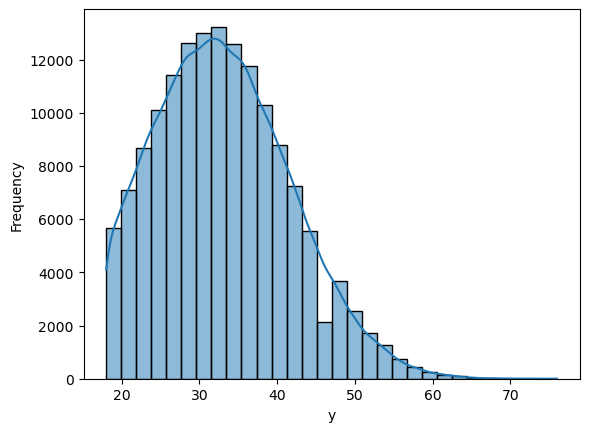

In [260]:
sns.histplot(data[y], bins=30, kde=True)
plt.xlabel('y')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


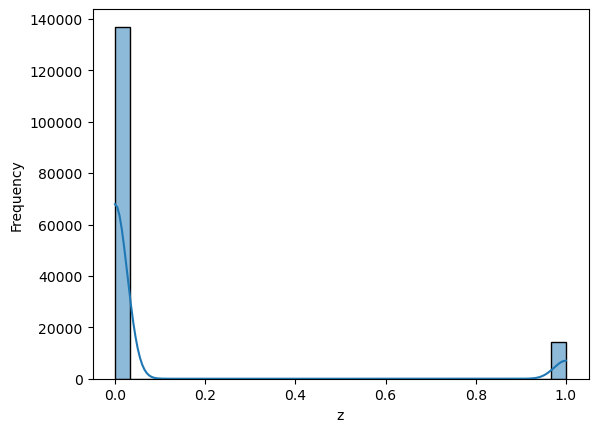

In [63]:
sns.histplot(data[z], bins=30, kde=True)
plt.xlabel('z')
plt.ylabel('Frequency')
plt.show()

# Analyzing categorical variables

In [179]:
data.dtypes

purchase_value            int64
source                    int64
browser                   int64
sex                       int64
age                       int64
class                     int64
country                   int64
signup_purchase_diff    float64
dtype: object

In [203]:
# There is no cat variable for converted dataset "data"

# univariate analaysis for data set 2

In [185]:
data2.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data2.shape

In [ ]:
data2.columns

In [ ]:
print(f'Time: {data2.Time.count()}')
print(f':Amount {data2.Amount.count()}')
print(f'Class: {data2.Class.count()}')

In [75]:
print(f'Time: {data2.Time.nunique()}')
print(f':Amount {data2.Amount.nunique()}')
print(f'Class: {data2.Class.nunique()}')

Time: 124592
:Amount 32767
Class: 2


# Analyzing a numerical variable for dataset2

In [188]:
n = 'Time'
print(f"Mean: {data2[n].mean()}")
print(f"Median: {data2[n].median()}")
print(f"Standard Deviation: {data2[n].std()}")
print(f"Minimum: {data2[n].min()}")
print(f"Maximum: {data2[n].max()}")


Mean: 94813.85957508067
Median: 84692.0
Standard Deviation: 47488.14595456582
Minimum: 0.0
Maximum: 172792.0


In [190]:
k = 'Amount'
print(f"Mean: {data2[k].mean()}")
print(f"Median: {data2[k].median()}")
print(f"Standard Deviation: {data2[k].std()}")
print(f"Minimum: {data2[k].min()}")
print(f"Maximum: {data2[k].max()}")

Mean: 88.34961925093133
Median: 22.0
Standard Deviation: 250.1201092402221
Minimum: 0.0
Maximum: 25691.16


In [192]:
g = 'Class'
print(f"Mean: {data2[g].mean()}")
print(f"Median: {data2[g].median()}")
print(f"Standard Deviation: {data2[g].std()}")
print(f"Minimum: {data2[g].min()}")
print(f"Maximum: {data2[g].max()}")

Mean: 0.001727485630620034
Median: 0.0
Standard Deviation: 0.0415271896355952
Minimum: 0
Maximum: 1


# Visualizing Data set 2 Use plots to visualize the distribution of the numerical variable.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


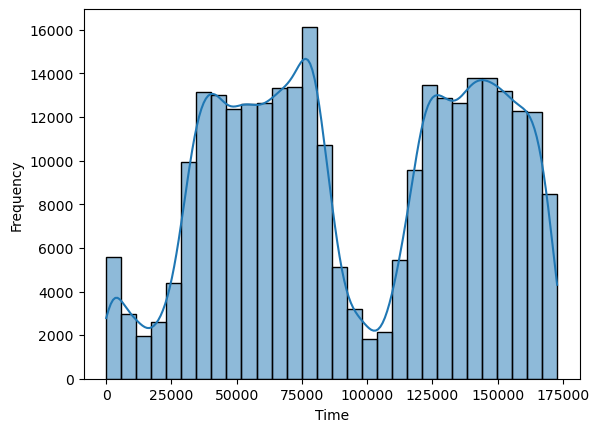

In [195]:
sns.histplot(data2[n], bins=30, kde=True)
plt.xlabel(n)
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


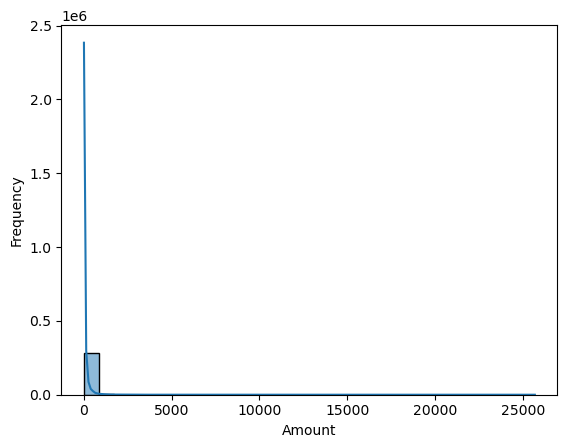

In [197]:
sns.histplot(data2[k], bins=30, kde=True)
plt.xlabel(k)
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


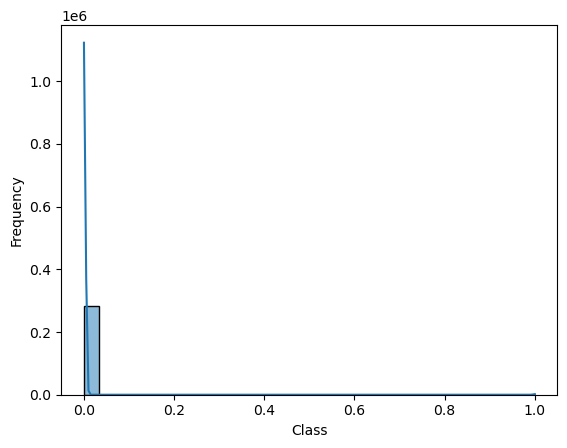

In [199]:
sns.histplot(data2[g], bins=30, kde=True)
plt.xlabel(g)
plt.ylabel('Frequency')
plt.show()

In [128]:
data2.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

 # Analyzing categorical variables for dataset 2

In [ ]:
# There is no cat variable.

In [192]:
#Univariate analaysis for dataset 3

In [87]:
data3.describe()

,lower_bound_ip_address,upper_bound_ip_address
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [89]:
data3.shape

(138846, 3)

In [96]:
data3.columns

Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], dtype='object')

In [97]:
print(f'e:lower_bound_ip_address {data3.lower_bound_ip_address.count()}')
print(f':upper_bound_ip_address {data3.upper_bound_ip_address.count()}')

e:lower_bound_ip_address 138846
:upper_bound_ip_address 138846


In [99]:
print(f':lower_bound_ip_address {data3.lower_bound_ip_address.nunique()}')
print(f':upper_bound_ip_address {data3.upper_bound_ip_address.nunique()}')


:lower_bound_ip_address 138846
:upper_bound_ip_address 138846


# Analyzing a numerical variable for Data set 3

In [205]:
o = 'lower_bound_ip_address'
print(f"Mean: {data3[o].mean()}")
print(f"Median: {data3[o].median()}")
print(f"Standard Deviation: {data3[o].std()}")
print(f"Minimum: {data3[o].min()}")
print(f"Maximum: {data3[o].max()}")

Mean: 2724531562.515996
Median: 3230887296.0
Standard Deviation: 897521519.7116138
Minimum: 16777216
Maximum: 3758096128


In [207]:
p = 'upper_bound_ip_address'
print(f"Mean: {data3[p].mean()}")
print(f"Median: {data3[p].median()}")
print(f"Standard Deviation: {data3[p].std()}")
print(f"Minimum: {data3[p].min()}")
print(f"Maximum: {data3[p].max()}")

Mean: 2724557062.218357
Median: 3230887551.0
Standard Deviation: 897497915.460137
Minimum: 16777471
Maximum: 3758096383


# Visualizing Data Use plots to visualize the distribution of the numerical variable.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


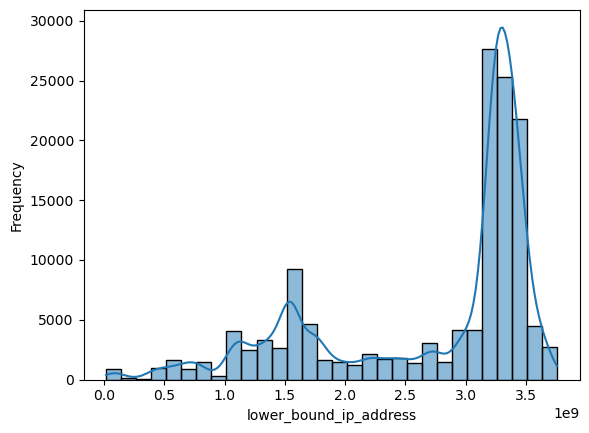

In [105]:
sns.histplot(data3[o], bins=30, kde=True)
plt.xlabel(o)
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


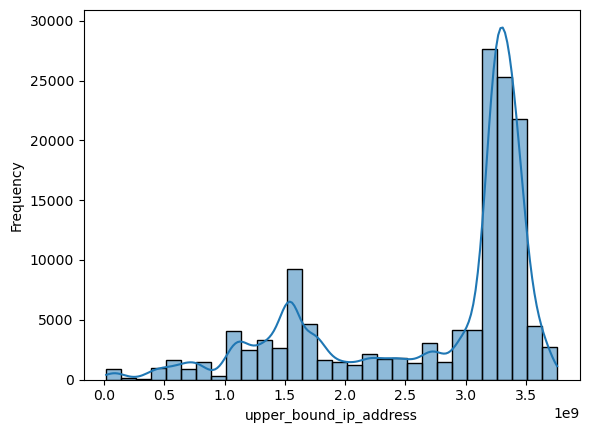

In [106]:
sns.histplot(data3[p], bins=30, kde=True)
plt.xlabel(p)
plt.ylabel('Frequency')
plt.show()

# Analyzing categorical variables

In [221]:
cat_var = 'country'
print(data3[cat_var].value_counts())

country
United States                            46868
Canada                                    6989
Russian Federation                        6739
Australia                                 6316
Germany                                   5999
                                         ...  
Timor-leste                                  1
Korea Democratic People's Republic of        1
St. Pierre and Miquelon                      1
Tokelau                                      1
Saint Lucia                                  1
Name: count, Length: 235, dtype: int64


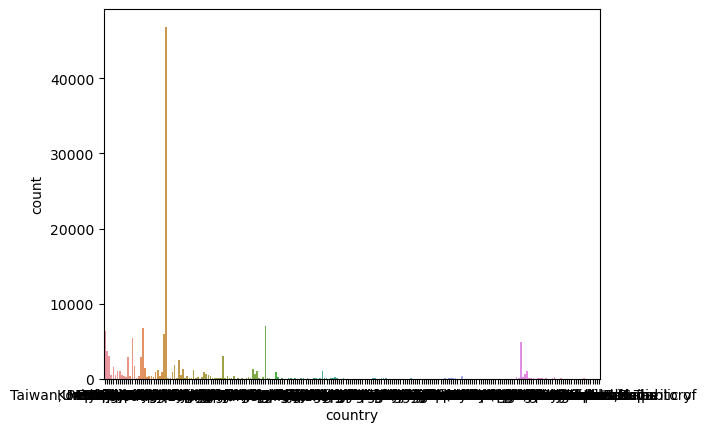

In [223]:
sns.countplot(x=cat_var, data=data3)
plt.xlabel(cat_var)
plt.ylabel('count')
plt.show()

# Bivariant Analysis

 # Using scatter plot for dataset data"

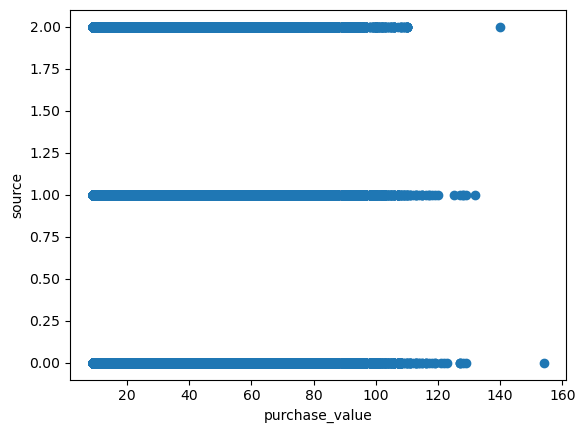

In [251]:
plt.scatter(data['purchase_value'], data['source'])
plt.ylabel('source')
plt.xlabel('purchase_value')
plt.show()

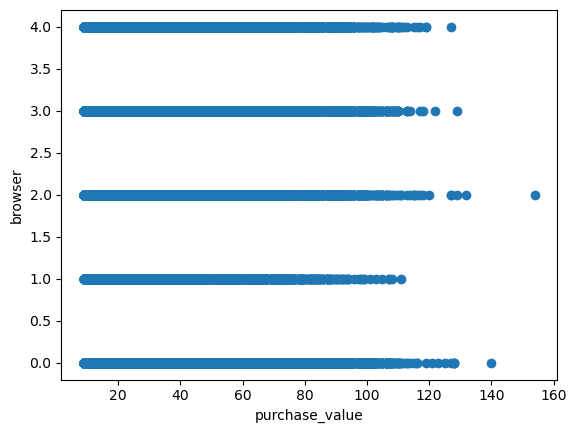

In [253]:
plt.scatter(data['purchase_value'], data['browser'])
plt.xlabel('purchase_value')
plt.ylabel('browser')
plt.show()

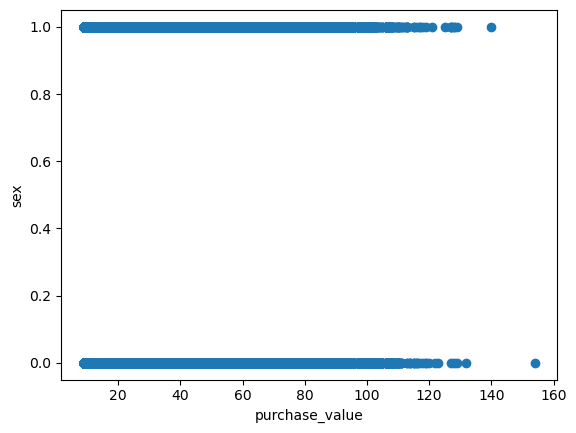

In [255]:
plt.scatter(data['purchase_value'], data['sex'])
plt.xlabel('purchase_value')
plt.ylabel('sex')
plt.show()

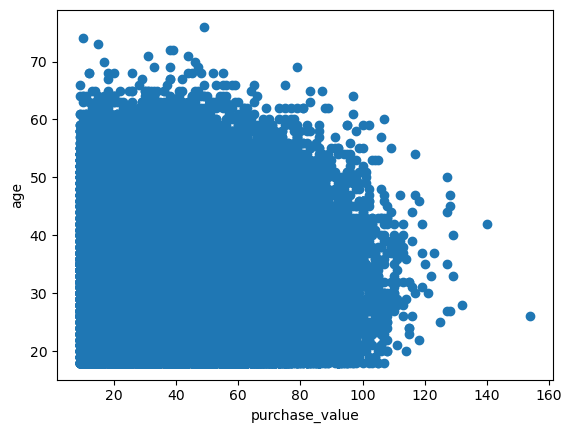

In [257]:
plt.scatter(data['purchase_value'], data['age'])
plt.xlabel('purchase_value')
plt.ylabel('age')
plt.show()

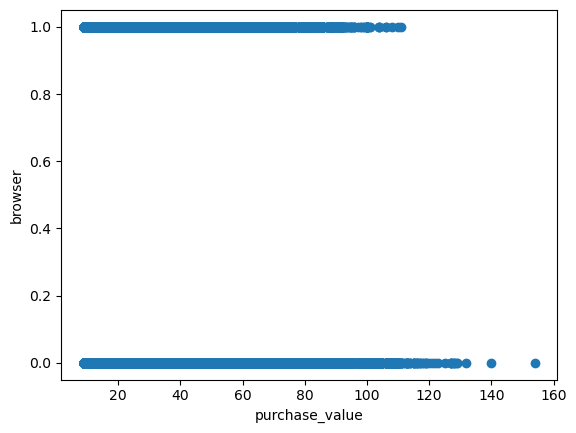

In [259]:
plt.scatter(data['purchase_value'], data['class'])
plt.xlabel('purchase_value')
plt.ylabel('browser')
plt.show()

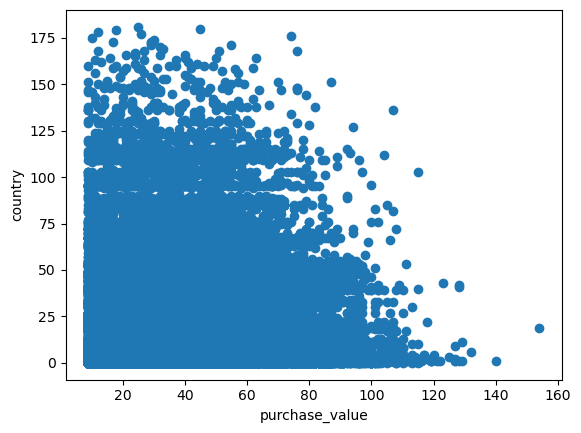

In [261]:
plt.scatter(data['purchase_value'], data['country'])
plt.xlabel('purchase_value')
plt.ylabel('country')
plt.show()

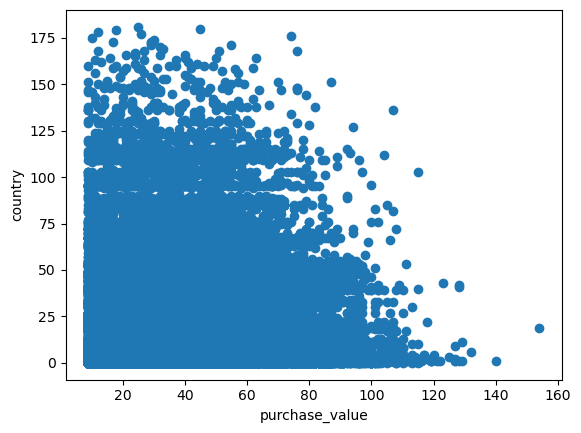

In [264]:
plt.scatter(data['purchase_value'], data['country'])
plt.xlabel('purchase_value')
plt.ylabel('country')
plt.show()

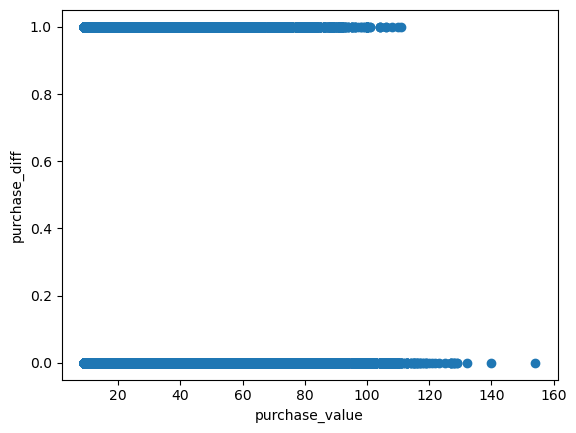

In [266]:
plt.scatter(data['purchase_value'], data['class'])
plt.xlabel('purchase_value')
plt.ylabel('purchase_diff')
plt.show()

# Using Correlation Coefficient for dataset "data"

In [233]:
data.dtypes

purchase_value            int64
source                    int64
browser                   int64
sex                       int64
age                       int64
class                     int64
country                   int64
signup_purchase_diff    float64
dtype: object

In [237]:
correlation = data['purchase_value'].corr(data['country'])
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: -0.0009411081290236616


In [239]:
correlation = data['purchase_value'].corr(data['signup_purchase_diff'])
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: 0.003440674780729564


In [241]:
correlation = data['purchase_value'].corr(data['sex'])
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: -0.0019956078546393414


In [243]:
correlation = data['purchase_value'].corr(data['browser'])
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: -0.0019956078546393414


In [245]:
correlation = data['purchase_value'].corr(data['source'])
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: -0.00013402401994974244


In [247]:
correlation = data['purchase_value'].corr(data['age'])
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: 0.0023698179233696774


# Using scatter plot for dataset 2

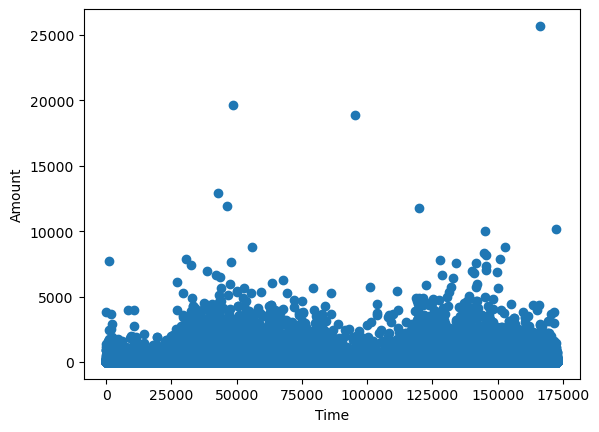

In [197]:
plt.scatter(data2['Time'], data2['Amount'])
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

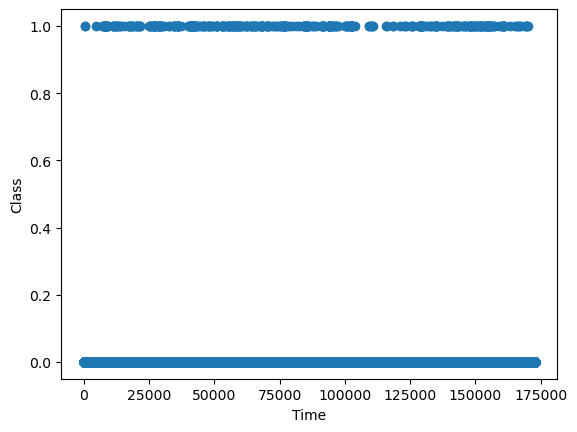

In [199]:
plt.scatter(data2['Time'], data2['Class'])
plt.xlabel('Time')
plt.ylabel('Class')
plt.show()

# Using Correlation Coefficient for dataset "data 2"

In [195]:
correlation = data2['Time'].corr(data2['Amount'])
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: -0.01059637338902923


# Using scatter plot for dataset 3

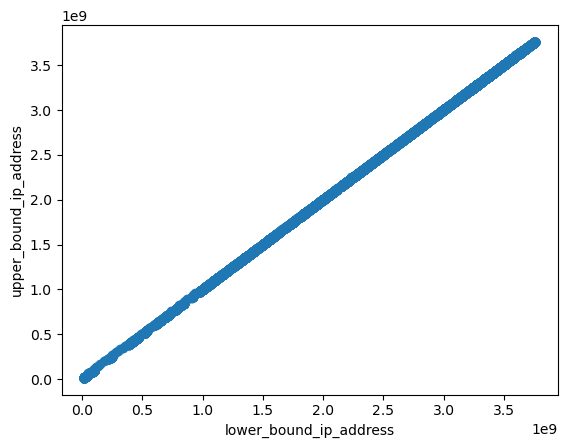

In [202]:
plt.scatter(data3['lower_bound_ip_address'], data3['upper_bound_ip_address'])
plt.xlabel('lower_bound_ip_address')
plt.ylabel('upper_bound_ip_address')
plt.show()

# Using Correlation Coefficient for dataset "data 2"

In [204]:
orrelation = data3['lower_bound_ip_address'].corr(data3['upper_bound_ip_address'])
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: -0.01059637338902923


# Merge Datasets for Geolocation Analysis


In [205]:
#Convert IP addresses to integer format

In [268]:
data

,purchase_value,source,browser,sex,age,class,country,signup_purchase_diff
0,34,0,0,0,39,0,0,4506682.0
1,16,1,0,1,53,0,1,17944.0
2,15,0,1,0,53,1,1,1.0
3,44,0,2,0,41,0,2,492085.0
4,39,1,2,0,45,0,1,4361461.0
...,...,...,...,...,...,...,...,...
151107,43,0,0,0,28,1,1,5261233.0
151108,35,0,2,0,32,0,22,931270.0
151109,40,0,3,1,26,0,0,6681616.0
151110,46,0,0,0,37,0,1,5146119.0


In [280]:
data3

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216,16777471,Australia
1,16777472,16777727,China
2,16777728,16778239,China
3,16778240,16779263,Australia
4,16779264,16781311,China
...,...,...,...
138841,3758092288,3758093311,Hong Kong
138842,3758093312,3758094335,India
138843,3758095360,3758095871,China
138844,3758095872,3758096127,Singapore


In [282]:
#Merge Fraud_Data.csv with IpAddress_to_Country.csv in our case dataset "data & data3"

####we have done the merging in the previous section as:-
def ip_to_country(ip):
    ip = int(ip)  # Convert IP address to integer if necessary
    country = data3[(data3['lower_bound_ip_address'] <= ip) &
                              (data3['upper_bound_ip_address'] >= ip)]
    if not country.empty:
        return country['country'].values[0]
    return 'unknown'

data['country'] = data['ip_address'].apply(ip_to_country)

# Feature Engineering

In [236]:
# Transaction frequency and velocity for Fraud_Data.csv

In [345]:
data = pd.read_csv('/Users/nadianesib/Desktop/week8-doc/data/Fraud_Data.csv')
data3 = pd.read_csv('/Users/nadianesib/Desktop/week8-doc/data/IpAddress_to_Country.csv')

In [343]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [347]:
# Calculate Transaction Frequency

In [361]:
# Calculate total number of transactions per user
transaction_count = data.groupby('user_id')['signup_time'].count().reset_index()
transaction_count.columns = ['user_id', 'transaction_count']

# Merge transaction count back into the original DataFrame
data = pd.merge(data, transaction_count, on='user_id', how='left')


In [365]:
# Convert timestamp to datetime if necessary
data['purchase_time'] = pd.to_datetime(data['purchase_time'])

# Calculate frequency of transactions per user
data['transaction_frequency'] = data.groupby('user_id')['purchase_time'].diff().apply(lambda x: x.days).fillna(0)


In [373]:
# Calculate velocity of transactions per user
data['transaction_velocity'] = data.groupby('user_id').cumcount() + 1

In [375]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,transaction_count_x,transaction_count_y,transaction_frequency,transaction_velocity
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1,1,0.0,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1,1,0.0,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1,1,0.0,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,1,1,0.0,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,1,1,0.0,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,1,1,0.0,1
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,1,1,0.0,1
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,1,1,0.0,1


In [290]:
#Time-Based features for Fraud_Data.csv 
#hour_of _day

In [410]:
data['signup_purchase_diff'] = pd.to_datetime(data['signup_purchase_diff'])

In [412]:
data['hour_of_day'] = data['signup_purchase_diff'].dt.hour


In [414]:
data['day_of_week'] = data['signup_purchase_diff'].dt.dayofweek

In [416]:
hour_of_day_counts = data['hour_of_day'].value_counts().sort_index()

In [418]:
day_of_week_counts = data['day_of_week'].value_counts().sort_index()

In [420]:
data

,purchase_value,source,browser,sex,age,class,country,signup_purchase_diff,hour_of_day,day_of_week
0,34,0,0,0,39,0,0,1970-01-01 00:00:00.004506682,0,3
1,16,1,0,1,53,0,1,1970-01-01 00:00:00.000017944,0,3
2,15,0,1,0,53,1,1,1970-01-01 00:00:00.000000001,0,3
3,44,0,2,0,41,0,2,1970-01-01 00:00:00.000492085,0,3
4,39,1,2,0,45,0,1,1970-01-01 00:00:00.004361461,0,3
...,...,...,...,...,...,...,...,...,...,...
151107,43,0,0,0,28,1,1,1970-01-01 00:00:00.005261233,0,3
151108,35,0,2,0,32,0,22,1970-01-01 00:00:00.000931270,0,3
151109,40,0,3,1,26,0,0,1970-01-01 00:00:00.006681616,0,3
151110,46,0,0,0,37,0,1,1970-01-01 00:00:00.005146119,0,3


# Normalization and Scaling

In [340]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
data[['user_id', 'purchase_value']] = scaler.fit_transform(data[['user_id', 'purchase_value']])

In [341]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,
0,0.055140,2015-02-24 22:55:49,2015-04-18 02:47:11,0.172414,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,0.0,-0.321436,-1.377455,0.991020,0.170603
1,0.833299,2015-06-07 20:39:50,2015-06-08 01:38:54,0.048276,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,0.0,-0.321436,-1.522122,-1.501259,0.081554
2,0.003393,2015-01-01 18:52:44,2015-01-01 18:52:45,0.041379,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,0.0,3.111035,0.937208,-0.005891,0.610371
3,0.375207,2015-04-28 21:13:25,2015-05-04 13:54:50,0.241379,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,0.0,-0.321436,0.213876,-1.501259,0.894219
4,0.553410,2015-07-21 07:09:52,2015-09-09 18:40:53,0.206897,NAUITBZFJKHWW,Ads,Safari,M,1.376155,0.0,-0.321436,0.937208,-0.504347,0.096752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,0.862924,2015-01-27 03:03:34,2015-03-29 00:30:47,0.234483,XPSKTWGPWINLR,SEO,Chrome,M,-0.596528,0.0,3.111035,-1.666788,1.489476,0.803554
151108,0.686176,2015-05-15 17:43:29,2015-05-26 12:24:39,0.179310,LYSFABUCPCGBA,SEO,Safari,M,-0.132367,0.0,-0.321436,0.069209,-1.002803,0.567895
151109,0.921040,2015-03-03 23:07:31,2015-05-20 07:07:47,0.213793,MEQHCSJUBRBFE,SEO,IE,F,-0.828608,0.0,-0.321436,-0.654123,-0.504347,0.639941
151110,0.519270,2015-07-09 20:06:07,2015-09-07 09:34:46,0.255172,CMCXFGRHYSTVJ,SEO,Chrome,M,0.447833,0.0,-0.321436,-0.364790,-1.501259,0.838485


In [332]:
# Initialize MinMaxScaler
data['ip_address'] = data['ip_address'].astype(int)
scaler = MinMaxScaler()
data[['age', 'ip_address']] = scaler.fit_transform(data[['age', 'ip_address']])

In [342]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,
0,0.055140,2015-02-24 22:55:49,2015-04-18 02:47:11,0.172414,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,0.0,-0.321436,-1.377455,0.991020,0.170603
1,0.833299,2015-06-07 20:39:50,2015-06-08 01:38:54,0.048276,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,0.0,-0.321436,-1.522122,-1.501259,0.081554
2,0.003393,2015-01-01 18:52:44,2015-01-01 18:52:45,0.041379,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,0.0,3.111035,0.937208,-0.005891,0.610371
3,0.375207,2015-04-28 21:13:25,2015-05-04 13:54:50,0.241379,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,0.0,-0.321436,0.213876,-1.501259,0.894219
4,0.553410,2015-07-21 07:09:52,2015-09-09 18:40:53,0.206897,NAUITBZFJKHWW,Ads,Safari,M,1.376155,0.0,-0.321436,0.937208,-0.504347,0.096752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,0.862924,2015-01-27 03:03:34,2015-03-29 00:30:47,0.234483,XPSKTWGPWINLR,SEO,Chrome,M,-0.596528,0.0,3.111035,-1.666788,1.489476,0.803554
151108,0.686176,2015-05-15 17:43:29,2015-05-26 12:24:39,0.179310,LYSFABUCPCGBA,SEO,Safari,M,-0.132367,0.0,-0.321436,0.069209,-1.002803,0.567895
151109,0.921040,2015-03-03 23:07:31,2015-05-20 07:07:47,0.213793,MEQHCSJUBRBFE,SEO,IE,F,-0.828608,0.0,-0.321436,-0.654123,-0.504347,0.639941
151110,0.519270,2015-07-09 20:06:07,2015-09-07 09:34:46,0.255172,CMCXFGRHYSTVJ,SEO,Chrome,M,0.447833,0.0,-0.321436,-0.364790,-1.501259,0.838485


In [333]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
data[['class', 'hour_of_day']] = scaler.fit_transform(data[['class', 'hour_of_day']])

In [343]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,
0,0.055140,2015-02-24 22:55:49,2015-04-18 02:47:11,0.172414,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,0.0,-0.321436,-1.377455,0.991020,0.170603
1,0.833299,2015-06-07 20:39:50,2015-06-08 01:38:54,0.048276,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,0.0,-0.321436,-1.522122,-1.501259,0.081554
2,0.003393,2015-01-01 18:52:44,2015-01-01 18:52:45,0.041379,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,0.0,3.111035,0.937208,-0.005891,0.610371
3,0.375207,2015-04-28 21:13:25,2015-05-04 13:54:50,0.241379,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,0.0,-0.321436,0.213876,-1.501259,0.894219
4,0.553410,2015-07-21 07:09:52,2015-09-09 18:40:53,0.206897,NAUITBZFJKHWW,Ads,Safari,M,1.376155,0.0,-0.321436,0.937208,-0.504347,0.096752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,0.862924,2015-01-27 03:03:34,2015-03-29 00:30:47,0.234483,XPSKTWGPWINLR,SEO,Chrome,M,-0.596528,0.0,3.111035,-1.666788,1.489476,0.803554
151108,0.686176,2015-05-15 17:43:29,2015-05-26 12:24:39,0.179310,LYSFABUCPCGBA,SEO,Safari,M,-0.132367,0.0,-0.321436,0.069209,-1.002803,0.567895
151109,0.921040,2015-03-03 23:07:31,2015-05-20 07:07:47,0.213793,MEQHCSJUBRBFE,SEO,IE,F,-0.828608,0.0,-0.321436,-0.654123,-0.504347,0.639941
151110,0.519270,2015-07-09 20:06:07,2015-09-07 09:34:46,0.255172,CMCXFGRHYSTVJ,SEO,Chrome,M,0.447833,0.0,-0.321436,-0.364790,-1.501259,0.838485


In [334]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
data[['day_of_week', 'hour_of_day']] = scaler.fit_transform(data[['day_of_week', 'hour_of_day']])

In [344]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,
0,0.055140,2015-02-24 22:55:49,2015-04-18 02:47:11,0.172414,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,0.0,-0.321436,-1.377455,0.991020,0.170603
1,0.833299,2015-06-07 20:39:50,2015-06-08 01:38:54,0.048276,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,0.0,-0.321436,-1.522122,-1.501259,0.081554
2,0.003393,2015-01-01 18:52:44,2015-01-01 18:52:45,0.041379,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,0.0,3.111035,0.937208,-0.005891,0.610371
3,0.375207,2015-04-28 21:13:25,2015-05-04 13:54:50,0.241379,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,0.0,-0.321436,0.213876,-1.501259,0.894219
4,0.553410,2015-07-21 07:09:52,2015-09-09 18:40:53,0.206897,NAUITBZFJKHWW,Ads,Safari,M,1.376155,0.0,-0.321436,0.937208,-0.504347,0.096752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,0.862924,2015-01-27 03:03:34,2015-03-29 00:30:47,0.234483,XPSKTWGPWINLR,SEO,Chrome,M,-0.596528,0.0,3.111035,-1.666788,1.489476,0.803554
151108,0.686176,2015-05-15 17:43:29,2015-05-26 12:24:39,0.179310,LYSFABUCPCGBA,SEO,Safari,M,-0.132367,0.0,-0.321436,0.069209,-1.002803,0.567895
151109,0.921040,2015-03-03 23:07:31,2015-05-20 07:07:47,0.213793,MEQHCSJUBRBFE,SEO,IE,F,-0.828608,0.0,-0.321436,-0.654123,-0.504347,0.639941
151110,0.519270,2015-07-09 20:06:07,2015-09-07 09:34:46,0.255172,CMCXFGRHYSTVJ,SEO,Chrome,M,0.447833,0.0,-0.321436,-0.364790,-1.501259,0.838485


In [329]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,
0,-1.543857,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,0.0,-0.321436,-1.377455,0.991020,0.170603
1,1.154115,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,0.0,-0.321436,-1.522122,-1.501259,0.081554
2,-1.723272,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,0.0,3.111035,0.937208,-0.005891,0.610371
3,-0.434147,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,0.0,-0.321436,0.213876,-1.501259,0.894219
4,0.183706,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,Ads,Safari,M,1.376155,0.0,-0.321436,0.937208,-0.504347,0.096752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,1.256829,2015-01-27 03:03:34,2015-03-29 00:30:47,0.330990,XPSKTWGPWINLR,SEO,Chrome,M,-0.596528,0.0,3.111035,-1.666788,1.489476,0.803554
151108,0.644021,2015-05-15 17:43:29,2015-05-26 12:24:39,-0.105627,LYSFABUCPCGBA,SEO,Safari,M,-0.132367,0.0,-0.321436,0.069209,-1.002803,0.567895
151109,1.458322,2015-03-03 23:07:31,2015-05-20 07:07:47,0.167258,MEQHCSJUBRBFE,SEO,IE,F,-0.828608,0.0,-0.321436,-0.654123,-0.504347,0.639941
151110,0.065338,2015-07-09 20:06:07,2015-09-07 09:34:46,0.494721,CMCXFGRHYSTVJ,SEO,Chrome,M,0.447833,0.0,-0.321436,-0.364790,-1.501259,0.838485


In [346]:
#scaling

In [347]:
# Initialize StandardScaler
scaler = StandardScaler()
data[['user_id', 'purchase_value']] = scaler.fit_transform(data[['user_id', 'purchase_value']])

In [349]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,
0,-1.543857,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,0.0,-0.321436,-1.377455,0.991020,0.170603
1,1.154115,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,0.0,-0.321436,-1.522122,-1.501259,0.081554
2,-1.723272,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,0.0,3.111035,0.937208,-0.005891,0.610371
3,-0.434147,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,0.0,-0.321436,0.213876,-1.501259,0.894219
4,0.183706,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,Ads,Safari,M,1.376155,0.0,-0.321436,0.937208,-0.504347,0.096752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,1.256829,2015-01-27 03:03:34,2015-03-29 00:30:47,0.330990,XPSKTWGPWINLR,SEO,Chrome,M,-0.596528,0.0,3.111035,-1.666788,1.489476,0.803554
151108,0.644021,2015-05-15 17:43:29,2015-05-26 12:24:39,-0.105627,LYSFABUCPCGBA,SEO,Safari,M,-0.132367,0.0,-0.321436,0.069209,-1.002803,0.567895
151109,1.458322,2015-03-03 23:07:31,2015-05-20 07:07:47,0.167258,MEQHCSJUBRBFE,SEO,IE,F,-0.828608,0.0,-0.321436,-0.654123,-0.504347,0.639941
151110,0.065338,2015-07-09 20:06:07,2015-09-07 09:34:46,0.494721,CMCXFGRHYSTVJ,SEO,Chrome,M,0.447833,0.0,-0.321436,-0.364790,-1.501259,0.838485


In [337]:
# Initialize StandardScaler
scaler = StandardScaler()
data['ip_address'] = data['ip_address'].astype(int)
scaler = StandardScaler()
data[['age', 'ip_address']] = scaler.fit_transform(data[['age', 'ip_address']])

In [348]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,
0,-1.543857,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,0.0,-0.321436,-1.377455,0.991020,0.170603
1,1.154115,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,0.0,-0.321436,-1.522122,-1.501259,0.081554
2,-1.723272,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,0.0,3.111035,0.937208,-0.005891,0.610371
3,-0.434147,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,0.0,-0.321436,0.213876,-1.501259,0.894219
4,0.183706,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,Ads,Safari,M,1.376155,0.0,-0.321436,0.937208,-0.504347,0.096752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,1.256829,2015-01-27 03:03:34,2015-03-29 00:30:47,0.330990,XPSKTWGPWINLR,SEO,Chrome,M,-0.596528,0.0,3.111035,-1.666788,1.489476,0.803554
151108,0.644021,2015-05-15 17:43:29,2015-05-26 12:24:39,-0.105627,LYSFABUCPCGBA,SEO,Safari,M,-0.132367,0.0,-0.321436,0.069209,-1.002803,0.567895
151109,1.458322,2015-03-03 23:07:31,2015-05-20 07:07:47,0.167258,MEQHCSJUBRBFE,SEO,IE,F,-0.828608,0.0,-0.321436,-0.654123,-0.504347,0.639941
151110,0.065338,2015-07-09 20:06:07,2015-09-07 09:34:46,0.494721,CMCXFGRHYSTVJ,SEO,Chrome,M,0.447833,0.0,-0.321436,-0.364790,-1.501259,0.838485


In [338]:
# Initialize StandardScaler
scaler = StandardScaler()
data[['class', 'hour_of_day']] = scaler.fit_transform(data[['class', 'hour_of_day']])

In [350]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,
0,-1.543857,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,0.0,-0.321436,-1.377455,0.991020,0.170603
1,1.154115,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,0.0,-0.321436,-1.522122,-1.501259,0.081554
2,-1.723272,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,0.0,3.111035,0.937208,-0.005891,0.610371
3,-0.434147,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,0.0,-0.321436,0.213876,-1.501259,0.894219
4,0.183706,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,Ads,Safari,M,1.376155,0.0,-0.321436,0.937208,-0.504347,0.096752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,1.256829,2015-01-27 03:03:34,2015-03-29 00:30:47,0.330990,XPSKTWGPWINLR,SEO,Chrome,M,-0.596528,0.0,3.111035,-1.666788,1.489476,0.803554
151108,0.644021,2015-05-15 17:43:29,2015-05-26 12:24:39,-0.105627,LYSFABUCPCGBA,SEO,Safari,M,-0.132367,0.0,-0.321436,0.069209,-1.002803,0.567895
151109,1.458322,2015-03-03 23:07:31,2015-05-20 07:07:47,0.167258,MEQHCSJUBRBFE,SEO,IE,F,-0.828608,0.0,-0.321436,-0.654123,-0.504347,0.639941
151110,0.065338,2015-07-09 20:06:07,2015-09-07 09:34:46,0.494721,CMCXFGRHYSTVJ,SEO,Chrome,M,0.447833,0.0,-0.321436,-0.364790,-1.501259,0.838485


In [339]:
# Initialize StandardScaler
scaler = StandardScaler()
data[['day_of_week', 'hour_of_day']] = scaler.fit_transform(data[['day_of_week', 'hour_of_day']])

In [351]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,
0,-1.543857,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,0.0,-0.321436,-1.377455,0.991020,0.170603
1,1.154115,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,0.0,-0.321436,-1.522122,-1.501259,0.081554
2,-1.723272,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,0.0,3.111035,0.937208,-0.005891,0.610371
3,-0.434147,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,0.0,-0.321436,0.213876,-1.501259,0.894219
4,0.183706,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,Ads,Safari,M,1.376155,0.0,-0.321436,0.937208,-0.504347,0.096752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,1.256829,2015-01-27 03:03:34,2015-03-29 00:30:47,0.330990,XPSKTWGPWINLR,SEO,Chrome,M,-0.596528,0.0,3.111035,-1.666788,1.489476,0.803554
151108,0.644021,2015-05-15 17:43:29,2015-05-26 12:24:39,-0.105627,LYSFABUCPCGBA,SEO,Safari,M,-0.132367,0.0,-0.321436,0.069209,-1.002803,0.567895
151109,1.458322,2015-03-03 23:07:31,2015-05-20 07:07:47,0.167258,MEQHCSJUBRBFE,SEO,IE,F,-0.828608,0.0,-0.321436,-0.654123,-0.504347,0.639941
151110,0.065338,2015-07-09 20:06:07,2015-09-07 09:34:46,0.494721,CMCXFGRHYSTVJ,SEO,Chrome,M,0.447833,0.0,-0.321436,-0.364790,-1.501259,0.838485


In [367]:
# normalizingfor data set 2

In [368]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
data2[['Time', 'Amount']] = scaler.fit_transform(data2[['Time', 'Amount']])

In [369]:
data2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0.0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0.0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0.0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0.0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.000030,0.0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.000965,0.0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.002642,0.0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0.000389,0.0


In [370]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
data2[['Time', 'Class']] = scaler.fit_transform(data2[['Time', 'Class']])

In [371]:
data2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0.0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0.0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0.0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0.0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.000030,0.0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.000965,0.0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.002642,0.0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0.000389,0.0


In [361]:
#scaling for dataset 2

In [375]:
scaler = StandardScaler()
data2[['Time', 'Amount']] = scaler.fit_transform(data2[['Time', 'Amount']])
data2[['Time', 'Class']] = scaler.fit_transform(data2[['Time', 'Class']])

In [376]:
data2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-0.041599
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-0.041599
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-0.041599
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-0.041599
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-0.041599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,-0.041599
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,-0.041599
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,-0.041599
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,-0.041599


In [377]:
#normalizing for dataset 3

In [395]:
scaler = MinMaxScaler()
data3['lower_bound_ip_address'] = data3['lower_bound_ip_address'].astype(int)
data3['upper_bound_ip_address'] = data3['upper_bound_ip_address'].astype(int)
scaler = MinMaxScaler()
data3[['lower_bound_ip_address', 'upper_bound_ip_address']] = scaler.fit_transform(data3[['lower_bound_ip_address', 'upper_bound_ip_address']])

In [396]:
data3

,lower_bound_ip_address,upper_bound_ip_address,country
0,0.0,0.0,Australia
1,0.0,0.0,China
2,0.0,0.0,China
3,0.0,0.0,Australia
4,0.0,0.0,China
...,...,...,...
138841,0.0,0.0,Hong Kong
138842,0.0,0.0,India
138843,0.0,0.0,China
138844,0.0,0.0,Singapore


In [397]:
#standardizing dataset3

In [398]:
scaler = StandardScaler()
scaler = MinMaxScaler()
data3['lower_bound_ip_address'] = data3['lower_bound_ip_address'].astype(int)
data3['upper_bound_ip_address'] = data3['upper_bound_ip_address'].astype(int)
scaler = MinMaxScaler()
data3[['lower_bound_ip_address', 'upper_bound_ip_address']] = scaler.fit_transform(data3[['lower_bound_ip_address', 'upper_bound_ip_address']])

In [399]:
data3

,lower_bound_ip_address,upper_bound_ip_address,country
0,0.0,0.0,Australia
1,0.0,0.0,China
2,0.0,0.0,China
3,0.0,0.0,Australia
4,0.0,0.0,China
...,...,...,...
138841,0.0,0.0,Hong Kong
138842,0.0,0.0,India
138843,0.0,0.0,China
138844,0.0,0.0,Singapore


In [12]:
#Encoding categorical coumn for data set 2

In [13]:
#no cat column/feature for dataset2

In [16]:
encoded_data3 = data3[['country']]

# Initialize encoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform
encoded_data3 = encoder.fit_transform(data3)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
encoded_data3

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Task 2 - Model Building and Training 
 

In [426]:
#Data Preparation:

Feature and Target Separation [‘Class’(creditcard)

In [429]:
features = data2.drop(['Class'], axis=1) 
target = data2['Class']

In [431]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [433]:
print("Shape of features_train:", features_train.shape)
print("Shape of features_test:", features_test.shape)
print("Shape of target_train:", target_train.shape)
print("Shape of y_test:", target_test.shape)

Shape of features_train: (227845, 30)
Shape of features_test: (56962, 30)
Shape of target_train: (227845,)
Shape of y_test: (56962,)


In [435]:
#Model Selection

Logistic Regression model

In [438]:
# Initialize logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(features_train, target_train)


LogisticRegression(max_iter=1000)

In [439]:
# Predict on test set
y_pred = model.predict(features_test)

Evaluate the Model: Assess the performance of the logistic regression model using evaluation metrics 
such as accuracy, precision, recall, and F1-score.

In [443]:
# Print classification report and confusion matrix
print(classification_report(target_test, y_pred))
print(confusion_matrix(target_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.49      0.60        98

    accuracy                           1.00     56962
   macro avg       0.89      0.74      0.80     56962
weighted avg       1.00      1.00      1.00     56962

[[56851    13]
 [   50    48]]


In [445]:
#The confusion_matrix shows the true positive, true negative, false positive, and false negative counts:

Decision tree

In [448]:
model = DecisionTreeClassifier(random_state=42)
model.fit(features_train, target_train)

DecisionTreeClassifier(random_state=42)

In [449]:
# Predict on test set
y_pred = model.predict(features_test)

In [450]:
# Print classification report and confusion matrix
print(classification_report(target_test, y_pred))
print(confusion_matrix(target_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.80      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962

[[56830    34]
 [   20    78]]


In [457]:
#The confusion_matrix shows the true positive, true negative, false positive, and false negative counts:

Random Forest

In [460]:
# Initialize random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(features_train, target_train)


RandomForestClassifier(random_state=42)

In [461]:
# Predict on test set
y_pred = model.predict(features_test)


In [462]:
# Print classification report and confusion matrix
print(classification_report(target_test, y_pred))
print(confusion_matrix(target_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[[56862     2]
 [   23    75]]


In [463]:
#The confusion_matrix shows the true positive, true negative, false positive, and false negative counts:

Gradient Boosting

In [465]:
# Initialize gradient boosting classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(features_train, target_train)

GradientBoostingClassifier(random_state=42)

In [466]:
# Predict on test set
y_pred = model.predict(features_test)

In [467]:
# Print classification report and confusion matrix
print(classification_report(target_test, y_pred))
print(confusion_matrix(target_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962

[[56843    21]
 [   39    59]]


In [468]:
#The confusion_matrix shows the true positive, true negative, false positive, and false negative counts:

Multi-Layer Perceptron (MLP)

In [470]:
# Initialize MLP classifier
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Fit the model
model.fit(features_train, target_train)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [471]:
# Predict on test set
y_pred = model.predict(features_test)

In [472]:
# Print classification report and confusion matrix
print(classification_report(target_test, y_pred))
print(confusion_matrix(target_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.17      0.27        98

    accuracy                           1.00     56962
   macro avg       0.83      0.59      0.64     56962
weighted avg       1.00      1.00      1.00     56962

[[56855     9]
 [   81    17]]


In [473]:
#The classification_report provides metrics like precision, recall, F1-score, and support (number of occurrences of each class in y_test).

Convolutional Neural Network (CNN)

In [475]:
features = data2.drop(['Class'], axis=1) 
target = data2['Class']

In [476]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [477]:
# Reshape data for compatibility with CNN-like model
features_train = np.expand_dims(features_train, axis=-1)  # Add a 'channels' dimension
features_test = np.expand_dims(features_test, axis=-1)

In [478]:
# Standardize/normalize the data AFTER reshaping
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train.reshape(features_train.shape[0], -1)).reshape(features_train.shape)
features_test = scaler.transform(features_test.reshape(features_test.shape[0], -1)).reshape(features_test.shape)

In [479]:
# Build the CNN model
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(features_train.shape[1], features_train.shape[2])),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [480]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [481]:
# Train the model
model.fit(features_train, target_train, epochs=10, batch_size=32, validation_data=(features_test, target_test))


Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 630s 88ms/step - accuracy: 0.9987 - loss: 0.0113 - val_accuracy: 0.9993 - val_loss: 0.0034
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 826us/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9994 - val_loss: 0.0037
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 837us/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 823us/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 831us/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9995 - val_loss: 0.0032
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 836us/step - accuracy: 0.9995 - loss: 0.0026 - val_accuracy: 0.9995 - val_loss: 0.0027
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 831us/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9995 - val_loss: 0.0028
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 817us/step - accuracy: 0.9994 

In [482]:
# Evaluate the model
loss, accuracy = model.evaluate(features_test, target_test)
print(f'Test accuracy: {accuracy:.4f}')

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 296us/step - accuracy: 0.9995 - loss: 0.0031
Test accuracy: 0.9995


Recurrent Neural Network (RNN)

In [484]:
X = data2.drop(['Class'], axis=1) 
y = data2['Class']

In [485]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [486]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [487]:
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(X_train_scaled.shape[1], 1)))
model.add(Dense(units=1, activation='sigmoid'))  

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [488]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [489]:
# Print a summary of the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [490]:
# Train the model with scaled data
model.fit(X_train_scaled[:, :, np.newaxis], y_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9923 - loss: 0.0284 - val_accuracy: 0.9989 - val_loss: 0.0058
Epoch 2/5
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9990 - loss: 0.0050 - val_accuracy: 0.9982 - val_loss: 0.0084
Epoch 3/5
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9990 - loss: 0.0055 - val_accuracy: 0.9995 - val_loss: 0.0036
Epoch 4/5
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9990 - loss: 0.0063 - val_accuracy: 0.9991 - val_loss: 0.0054
Epoch 5/5
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9989 - loss: 0.0070 - val_accuracy: 0.9989 - val_loss: 0.0049


In [491]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_scaled[:, :, np.newaxis], y_test)
print(f'Test Accuracy: {test_acc}')


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 483us/step - accuracy: 0.9985 - loss: 0.0056
Test Accuracy: 0.9985780119895935


Long Short-Term Memory (LSTM)

In [493]:
features = data2.drop(['Class'], axis=1) 
target = data2['Class']

In [494]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [495]:
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

In [496]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(features_train_scaled.shape[1], 1)))  # LSTM layer with 64 units
model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [497]:
model.fit(features_train_scaled[:, :, np.newaxis], target_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9971 - loss: 0.0207 - val_accuracy: 0.9993 - val_loss: 0.0038
Epoch 2/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9993 - loss: 0.0040 - val_accuracy: 0.9995 - val_loss: 0.0032
Epoch 3/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9993 - loss: 0.0041 - val_accuracy: 0.9993 - val_loss: 0.0037
Epoch 4/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 0.9995 - val_loss: 0.0029
Epoch 5/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9993 - loss: 0.0040 - val_accuracy: 0.9995 - val_loss: 0.0031
Epoch 6/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9991 - loss: 0.0037 - val_accuracy: 0.9995 - val_loss: 0.0028
Epoch 7/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9996 - val_loss: 0.0026
Epoch 8/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9993 - loss: 0

In [498]:
test_loss, test_acc = model.evaluate(features_test_scaled[:, :, np.newaxis], target_test)
print(f'Test Accuracy: {test_acc}')

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9993 - loss: 0.0033
Test Accuracy: 0.9992275834083557


 # Model Building and Training for dataset "data"


In [534]:
#Data Preparation

 Feature and Target Separation [‘class’(Fraud_Data)]

In [599]:
#logistic regression

In [601]:
# Example: Handling missing values (if any)
data = data.dropna()

In [603]:
feature = data.drop(['class'], axis=1) 
targets = data['class']

In [605]:
feature_train, feature_test, targets_train, targets_test = train_test_split(feature, targets, test_size=0.2, random_state=42)

In [607]:
print("Shape of feature_train:", features_train.shape)
print("Shape of feature_test:", features_test.shape)
print("Shape of targets_train:", target_train.shape)
print("Shape of targets_test:", target_test.shape)

Shape of feature_train: (227845, 30)
Shape of feature_test: (56962, 30)
Shape of targets_train: (227845,)
Shape of targets_test: (56962,)


In [609]:
#model selection

Logistic regression

In [612]:
data

,purchase_value,source,browser,sex,age,class,country,signup_purchase_diff
0,34,0,0,0,39,0,0,4506682.0
1,16,1,0,1,53,0,1,17944.0
2,15,0,1,0,53,1,1,1.0
3,44,0,2,0,41,0,2,492085.0
4,39,1,2,0,45,0,1,4361461.0
...,...,...,...,...,...,...,...,...
151107,43,0,0,0,28,1,1,5261233.0
151108,35,0,2,0,32,0,22,931270.0
151109,40,0,3,1,26,0,0,6681616.0
151110,46,0,0,0,37,0,1,5146119.0


In [614]:
# Initialize logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(feature_train, targets_train)


LogisticRegression(max_iter=1000)

In [616]:
# Predict on test set
y_pred = model.predict(feature_test)

Evaluate the Model: Assess the performance of the logistic regression model using evaluation metrics such as accuracy, precision, recall, and F1-score.



In [618]:
# Print classification report and confusion matrix
print(classification_report(targets_test, y_pred))
print(confusion_matrix(targets_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27373
           1       0.00      0.00      0.00      2850

    accuracy                           0.91     30223
   macro avg       0.45      0.50      0.48     30223
weighted avg       0.82      0.91      0.86     30223

[[27373     0]
 [ 2850     0]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [620]:
#The confusion_matrix shows the true positive, true negative, false positive, and false negative counts:

decision tree

In [623]:
model = DecisionTreeClassifier(random_state=42)
model.fit(feature_train, targets_train)

DecisionTreeClassifier(random_state=42)

In [624]:
# Predict on test set
y_pred = model.predict(feature_test)

In [627]:
# Print classification report and confusion matrix
print(classification_report(targets_test, y_pred))
print(confusion_matrix(targets_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     27373
           1       0.49      0.57      0.53      2850

    accuracy                           0.90     30223
   macro avg       0.72      0.75      0.74     30223
weighted avg       0.91      0.90      0.91     30223

[[25724  1649]
 [ 1236  1614]]


Random forest

In [630]:
# Initialize random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(feature_train, targets_train)

RandomForestClassifier(random_state=42)

In [631]:
# Predict on test set
y_pred = model.predict(feature_test)


In [632]:
# Print classification report and confusion matrix
print(classification_report(targets_test, y_pred))
print(confusion_matrix(targets_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27373
           1       1.00      0.54      0.70      2850

    accuracy                           0.96     30223
   macro avg       0.97      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223

[[27366     7]
 [ 1316  1534]]


Gradient boosting

In [634]:
# Initialize gradient boosting classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(feature_train, targets_train)

GradientBoostingClassifier(random_state=42)

In [635]:
# Predict on test set
y_pred = model.predict(feature_test)

In [636]:
# Print classification report and confusion matrix
print(classification_report(targets_test, y_pred))
print(confusion_matrix(targets_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27373
           1       1.00      0.54      0.70      2850

    accuracy                           0.96     30223
   macro avg       0.98      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223

[[27373     0]
 [ 1317  1533]]


Multi-Layer Perceptron (MLP)

In [641]:
# Initialize MLP classifier
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Fit the model
model.fit(feature_train, targets_train)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [642]:
# Predict on test set
y_pred = model.predict(feature_test)

In [643]:
# Print classification report and confusion matrix
print(classification_report(targets_test, y_pred))
print(confusion_matrix(targets_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27373
           1       1.00      0.54      0.70      2850

    accuracy                           0.96     30223
   macro avg       0.98      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223

[[27373     0]
 [ 1317  1533]]


Convolutional Neural Network (CNN)

In [645]:
feature = data.drop(['class'], axis=1) 
targets = data['class']

In [646]:
feature_train, feature_test, targets_train, targets_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [647]:
# Reshape data for compatibility with CNN-like model
feature_train = np.expand_dims(feature_train, axis=-1)  # Add a 'channels' dimension
feature_test = np.expand_dims(feature_test, axis=-1)

In [648]:
# Standardize/normalize the data AFTER reshaping
scaler = StandardScaler()
feature_train = scaler.fit_transform(feature_train.reshape(feature_train.shape[0], -1)).reshape(feature_train.shape)
feature_test = scaler.transform(feature_test.reshape(feature_test.shape[0], -1)).reshape(feature_test.shape)

In [649]:
# Build the CNN model
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(feature_train.shape[1], feature_train.shape[2])),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [650]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [651]:
# Train the model
model.fit(feature_train, targets_train, epochs=10, batch_size=32, validation_data=(features_test, target_test))


Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 836us/step - accuracy: 0.9973 - loss: 0.0142 - val_accuracy: 0.9983 - val_loss: 47.3113
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 810us/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9983 - val_loss: 32.9494
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 838us/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9983 - val_loss: 33.1945
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 824us/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9983 - val_loss: 55.8379
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 829us/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9983 - val_loss: 83.5236
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 816us/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9983 - val_loss: 88.5039
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 839us/step - accuracy: 0.9995 - loss: 0.0030 - val_accuracy: 0.9983 - val_loss: 129.8554
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 822us/step - accuracy: 

In [699]:
# Evaluate the model
loss, accuracy = model.evaluate(feature_test, targets_test)
print(f'Test accuracy: {accuracy:.4f}')

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9816 - loss: 0.0911
Test accuracy: 0.9820


Recurrent Neural Network (RNN)

In [666]:
A = data.drop(['class'], axis=1) 
b = data['class']

In [668]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

In [670]:
scaler = StandardScaler()
A_train_scaled = scaler.fit_transform(A_train)
A_test_scaled = scaler.transform(A_test)

In [672]:
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(A_train_scaled.shape[1], 1)))  
model.add(Dense(units=1, activation='sigmoid'))  

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [674]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [676]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [678]:
model.fit(A_train_scaled[:, :, np.newaxis], b_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 2s 527us/step - accuracy: 0.8991 - loss: 0.2865 - val_accuracy: 0.9419 - val_loss: 0.2497
Epoch 2/5
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 2s 505us/step - accuracy: 0.9144 - loss: 0.2492 - val_accuracy: 0.9390 - val_loss: 0.2328
Epoch 3/5
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 2s 505us/step - accuracy: 0.9283 - loss: 0.2381 - val_accuracy: 0.9154 - val_loss: 0.2260
Epoch 4/5
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 2s 505us/step - accuracy: 0.9351 - loss: 0.2251 - val_accuracy: 0.9420 - val_loss: 0.2209
Epoch 5/5
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 2s 548us/step - accuracy: 0.9355 - loss: 0.2270 - val_accuracy: 0.9063 - val_loss: 0.2238


In [679]:
test_loss, test_acc = model.evaluate(A_test_scaled[:, :, np.newaxis], b_test)
print(f'Test Accuracy: {test_acc}')

945/945 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.9096 - loss: 0.2242
Test Accuracy: 0.9060318470001221


Long Short-Term Memory (LSTM)

In [682]:
A = data.drop(['class'], axis=1) 
b = data['class']

In [684]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

In [686]:
scaler = StandardScaler()
A_train_scaled = scaler.fit_transform(A_train)
A_test_scaled = scaler.transform(A_test)

In [688]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(A_train_scaled.shape[1], 1)))  
model.add(Dense(units=1, activation='sigmoid'))  


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [690]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [692]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [694]:
model.fit(A_train_scaled[:, :, np.newaxis], b_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 4s 978us/step - accuracy: 0.9037 - loss: 0.2933 - val_accuracy: 0.9062 - val_loss: 0.2389
Epoch 2/10
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 3s 979us/step - accuracy: 0.9239 - loss: 0.2370 - val_accuracy: 0.9445 - val_loss: 0.2255
Epoch 3/10
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 3s 962us/step - accuracy: 0.9374 - loss: 0.2258 - val_accuracy: 0.9098 - val_loss: 0.2272
Epoch 4/10
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 3s 977us/step - accuracy: 0.9409 - loss: 0.2201 - val_accuracy: 0.9356 - val_loss: 0.2188
Epoch 5/10
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 3s 956us/step - accuracy: 0.9417 - loss: 0.2180 - val_accuracy: 0.9373 - val_loss: 0.2156
Epoch 6/10
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 3s 957us/step - accuracy: 0.9428 - loss: 0.2152 - val_accuracy: 0.9430 - val_loss: 0.2117
Epoch 7/10
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 3s 973us/step - accuracy: 0.9440 - loss: 0.2130 - val_accuracy: 0.9398 - val_loss: 0.2121
Epoch 8/10
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 3s 949us/step - accuracy: 0.9435 -

In [695]:
test_loss, test_acc = model.evaluate(A_test_scaled[:, :, np.newaxis], b_test)
print(f'Test Accuracy: {test_acc}')

945/945 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.9401 - loss: 0.2102
Test Accuracy: 0.9409059286117554


# MLOps Steps

#Versioning and Experiment Tracking

#Use tools like MLflow to track experiments, log parameters, metrics, and version models.


In [701]:
hello

NameError: name 'hello' is not defined